In [1]:
import pandas_datareader as pdr

In [2]:
key = "070644c07da656b3764138e22d620de049dd4eba"

In [3]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Define the parameters
symbol = 'NVDA'
api_key = '070644c07da656b3764138e22d620de049dd4eba'  # replace with your actual API key
end_date = datetime.now().date()
start_date = end_date - timedelta(days=5*365)  # Approximate 5 years

# Construct the URL and parameters
url = f'https://api.tiingo.com/tiingo/daily/{symbol}/prices?startDate={start_date}&endDate={end_date}'
headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Token {api_key}'
}

# Make the request
response = requests.get(url, headers=headers)

# Convert the response to a DataFrame
data = response.json()
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('NVDA.csv', index=False)


In [4]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2019-10-31T00:00:00.000Z,201.02,203.00,197.81,202.16,5243315,5.001081,5.050340,4.921221,5.029442,209732600,0.0,1.0
1,2019-11-01T00:00:00.000Z,202.59,203.89,198.59,199.60,7090956,5.040140,5.072482,4.940626,4.965753,283638240,0.0,1.0
2,2019-11-04T00:00:00.000Z,210.50,211.00,204.92,205.85,9417905,5.236929,5.249369,5.098107,5.121244,376716200,0.0,1.0
3,2019-11-05T00:00:00.000Z,209.61,211.54,207.68,210.49,7521712,5.214787,5.262803,5.166772,5.236680,300868480,0.0,1.0
4,2019-11-06T00:00:00.000Z,207.63,209.67,204.11,208.64,6725335,5.165528,5.216280,5.077955,5.190655,269013400,0.0,1.0


In [5]:
df.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1250,2024-10-21T00:00:00.000Z,143.71,143.71,138.00,138.13,264554514,143.71,143.71,138.00,138.13,264554514,0.0,1.0
1251,2024-10-22T00:00:00.000Z,143.59,144.42,141.78,142.91,226311589,143.59,144.42,141.78,142.91,226311589,0.0,1.0
1252,2024-10-23T00:00:00.000Z,139.56,142.43,137.46,142.03,285930038,139.56,142.43,137.46,142.03,285930038,0.0,1.0
1253,2024-10-24T00:00:00.000Z,140.41,141.35,138.46,140.82,172354888,140.41,141.35,138.46,140.82,172354888,0.0,1.0
1254,2024-10-25T00:00:00.000Z,141.54,144.13,140.80,140.93,205122109,141.54,144.13,140.80,140.93,205122109,0.0,1.0


In [6]:
df1=df.reset_index()['close']

In [7]:
df1.shape

(1255,)

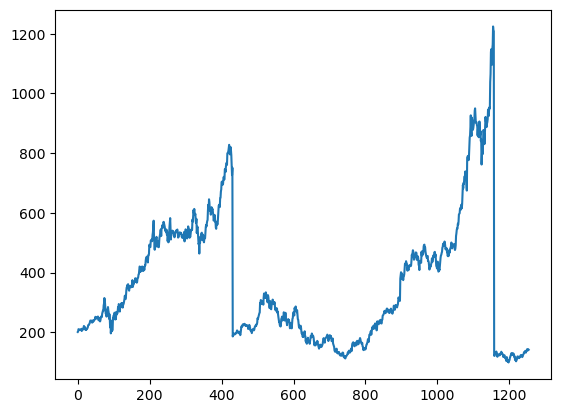

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
import numpy as np

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1

array([[0.09072493],
       [0.09211988],
       [0.09914793],
       ...,
       [0.0361176 ],
       [0.03687283],
       [0.03787684]])

In [12]:
training_size = int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1):1]

In [13]:
training_size, test_size

(815, 440)

In [14]:
def create_dataset(dataset, time_step=1):
    dataX, dataY= [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
time_step=100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [16]:
print(X_train)

[[0.09072493 0.09211988 0.09914793 ... 0.10109375 0.13351518 0.13035211]
 [0.09211988 0.09914793 0.09835716 ... 0.13351518 0.13035211 0.14067651]
 [0.09914793 0.09835716 0.09659793 ... 0.13035211 0.14067651 0.13666936]
 ...
 [0.05251046 0.04955175 0.04622875 ... 0.06651325 0.06107562 0.07061813]
 [0.04955175 0.04622875 0.03594879 ... 0.06107562 0.07061813 0.08264845]
 [0.04622875 0.03594879 0.03337213 ... 0.07061813 0.08264845 0.08328817]]


In [17]:
print(X_train.shape), print(y_train.shape)

(714, 100)
(714,)


(None, None)

In [18]:
X_test.shape

(339, 100)

In [19]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [20]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\siddh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 468ms/step - loss: 0.0342 - val_loss: 0.0318
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 267ms/step - loss: 0.0068 - val_loss: 0.0203
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - loss: 0.0040 - val_loss: 0.0189
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 267ms/step - loss: 0.0038 - val_loss: 0.0174
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - loss: 0.0034 - val_loss: 0.0170
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - loss: 0.0042 - val_loss: 0.0156
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step - loss: 0.0040 - val_loss: 0.0150
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 258ms/step - loss: 0.0026 - val_loss: 0.0138
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 291ms/step - loss: 0.0028 - val_loss: 0.0132
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 304ms/step - loss: 0.0022 - val_loss: 0.0124
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - loss: 0.0032 - val_loss: 0.0117
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 

In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

393.0667634565681

In [30]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

555.9129576281405

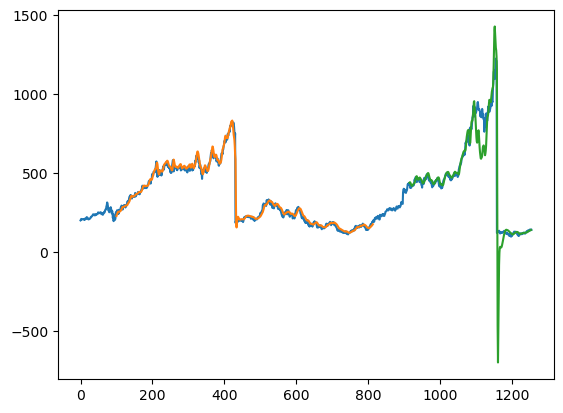

In [33]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)

440

In [35]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.03846205]
101
1 day input [0.9871878  0.98621045 0.02032892 0.01954704 0.02335871 0.02727701
 0.02929391 0.02849426 0.03258136 0.02831656 0.02457596 0.01705924
 0.02414948 0.02442492 0.02228363 0.0218838  0.02255906 0.02111081
 0.0260953  0.02391847 0.02602422 0.02884966 0.03198607 0.02531342
 0.02694826 0.02623746 0.02438938 0.01695262 0.01970697 0.01689931
 0.0218838  0.02103972 0.01362962 0.01187927 0.0125723  0.0112662
 0.00428258 0.01609077 0.00915157 0.00742788 0.00136829 0.0047446
 0.         0.00538432 0.00518885 0.00898275 0.01530889 0.01703258
 0.02127962 0.02280784 0.02762352 0.02518014 0.02629077 0.0220615
 0.02706377 0.02447823 0.02611307 0.023723   0.01659722 0.01817875
 0.00807648 0.00648606 0.00737457 0.00348293 0.00671707 0.00816533
 0.01599303 0.01797439 0.01793885 0.01587753 0.01482021 0.01284774
 0.016846   0.0151845  0.01541551 0.0195115  0.02185715 0.02232805
 0.01998241 0.02001795 0.016073   0.01771673 0.02127074 0.02310993
 0.02559774 0.03019129 0.02997805 0.

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
len(df1)

1255

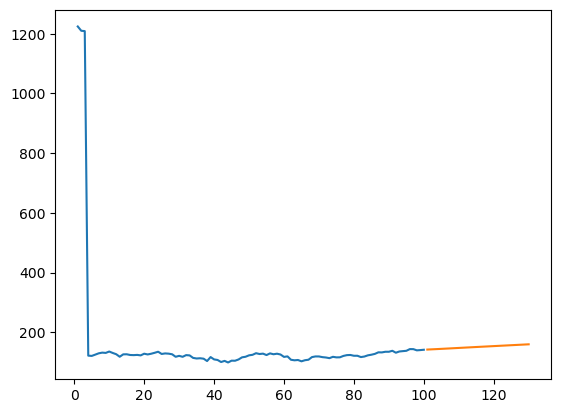

In [40]:
plt.plot(day_new,scaler.inverse_transform(df1[1155:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

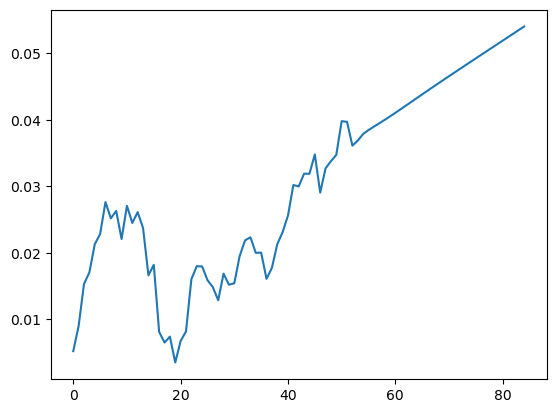

In [41]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [42]:
df3=scaler.inverse_transform(df3).tolist()

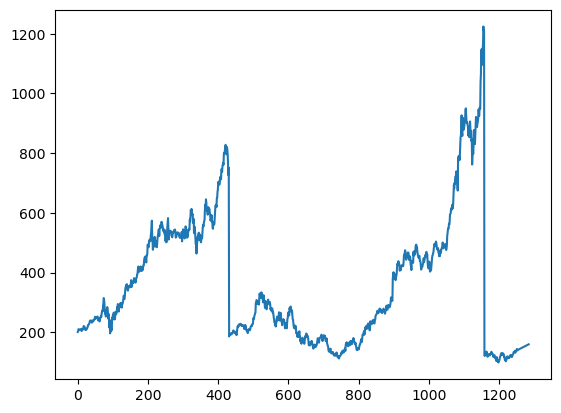

In [43]:
plt.plot(df3)